Oplossen van eerste orde lineaire discrete dynamische systemen in Python
========================================================================

Inleiding
---------

In de theorieles is het oplossen van discrete dynamische systemen
uitgebreid aan bod gekomen. In de besproken voorbeelden stelt de
overgangsmatrix steeds een $2 \times 2$ of een $3 \times 3$ matrix voor.
Van deze systemen kunnen de eigenwaarden en eigenvectoren, en bijgevolg
de oplossingen, eenvoudig met de hand uitgerekend worden. Van zodra het
aantal variabelen echter toeneemt, worden de berekeningen erg omslachtig
en tijdrovend. Vandaar dat we in dergelijke gevallen onze toevlucht
moeten zoeken tot de computer.

In dit practicum zullen we leren hoe we discrete dynamische systemen
kunnen visualiseren en oplossen in Python. Alle functies en
functionaliteiten die we nodig zullen hebben, zitten in de pakketten
`sympy` en `matplotlib.pyplot` en het Python-bestand `functies2.py`.
Vermits deze pakketten niet standaard geladen worden, dienen we ze te
importeren. Dit kan gerealiseerd worden door de volgende instructies in
te geven en uit te voeren in een Python console of een cel in een Jupyter notebook.

    In []: from sympy import *
    In []: import matplotlib.pyplot as plt
    In []: from functies2 import *

De tweede instructie laat ons toe de functies in het pakket
`matplotlib.pyplot` te gebruiken door `plt` te plaatsen voor de
functienaam in plaats van steeds de volledige pakketnaam
`matplotlib.pyplot` te moeten gebruiken. De derde instructie ten slotte
importeert alle functies uit het Python-bestand `functies2.py` zodat
deze beschikbaar worden. We benadrukken dat deze instructies steeds
moeten uitgevoerd worden wanneer we Spyder opstarten.

Vooraleer we overgaan tot het oplossen van discrete dynamische systemen
zullen we eerst zien hoe we de eigenwaarden en de corresponderende
eigenvectoren van een matrix kunnen berekenen in Python. In wat volgt
beschouwen we enkel vierkante matrices.

Eigenwaarden en eigenvectoren
-----------------------------

### Eigenwaarden

Matrices kunnen gecreëerd worden met de instructie `Matrix` uit het
pakket `sympy`. Ook eigenwaarden kunnen bepaald worden met dit pakket.
Hiervoor kan de ingebouwde methode `eigenvals` gebruikt worden. Deze
functie geeft een *dictionary* terug, waarvan de keys (voor de dubbele
punt) de eigenwaarden zijn en de waarden (na de dubbele punt) de
algebraïsche multipliciteiten. Voor de matrix $$\label{eq:A}
A = 
\begin{bmatrix}
3 & -2 & 4 & -2 \\
5 & 3 & -3 & -2 \\
5 & -2 & 2 & -2 \\
5 & -2 & -3 & 3
\end{bmatrix}$$ dienen we de onderstaande instructies in te geven in
Python.

In [14]:
from sympy import *
A = Matrix([[3, -2,  4, -2], 
            [5,  3, -3, -2], 
            [5, -2,  2, -2],
            [5, -2, -3,  3]])
pprint(A)
A.eigenvals()

⎡3  -2  4   -2⎤
⎢             ⎥
⎢5  3   -3  -2⎥
⎢             ⎥
⎢5  -2  2   -2⎥
⎢             ⎥
⎣5  -2  -3  3 ⎦


{3: 1, -2: 1, 5: 2}

Uit het resultaat lezen we af dat de eigenwaarden $3$ en $-2$
algebraïsche multipliciteit $1$ hebben en de eigenwaarde $5$
algebraïsche multipliciteit $2$ heeft.

### Diagonalisatie

Python kan naast het berekenen van eigenwaarden en eigenvectoren ook een
matrix $P$ en een diagonaalmatrix $D$ opstellen zodat $A=PDP^{-1}$. Dit
kan eenvoudig met de methode `diagonalize`. Deze methode geeft een tupel
met twee elementen weer: het eerste element is een matrix $P$, het
tweede element is de diagonaalmatrix $D$ die overeenstemt met $P$. Om de
matrices te bepalen geven we eenvoudig het volgende in.

In [13]:
P,D = A.diagonalize()
pprint(P)
print()
pprint(D)

⎡0  1  1  0 ⎤
⎢           ⎥
⎢1  1  1  -1⎥
⎢           ⎥
⎢1  1  1  0 ⎥
⎢           ⎥
⎣1  1  0  1 ⎦

⎡-2  0  0  0⎤
⎢           ⎥
⎢0   3  0  0⎥
⎢           ⎥
⎢0   0  5  0⎥
⎢           ⎥
⎣0   0  0  5⎦


Indien een matrix niet diagonaliseerbaar is, dan zal de foutmelding
'Matrix is not diagonalizable' in de console verschijnen.

### Opdracht 2.1

Gegeven zijn twee matrices $A_1$ en $A_2$:

$A_1 = 
\begin{bmatrix}
15 & 18 & -8 & 6 & -5 \\
5 & 3 & 1 & -1 & -3 \\
0 & -4 & 5 & -4 & -2 \\
-43 & -46 & 17 & -14 & 15 \\
26 & 30 & -12 & 8 & -10
\end{bmatrix}$ en $A_2 = \begin{bmatrix}
29 & 14 & 2 & 6 & -9 \\
-47 & -22 & -1 & -11 & 13 \\
19 & 10 & 5 & 4 & -8 \\
-19 & -10 & -3 & -2 & 8 \\
7 & 4 & 3 & 1 & -3
\end{bmatrix}\,.$

[//]: # "Maak een script *`opdracht1.py`* aan waarin je de volgende deelopdrachten uitvoert."

Voer volgende deelopdrachten uit in de cel(len) hieronder:

-   Geef de matrices $A_1$ en $A_2$ in als *`A1`* en *`A2`*.

-   Bepaal van beide matrices de eigenwaarden en hun algebraïsche en
    meetkundige multipliciteiten. Bepaal tevens voor beide matrices de
    eigenruimten die horen bij de gevonden eigenwaarden.

-   Stel van beide matrices een diagonalisatie op indien mogelijk.

Discrete dynamische systemen
----------------------------

Een eerste orde lineair discreet dynamisch systeem wordt gedefinieerd
als een dynamisch systeem dat kan voorgesteld worden als een eerste orde
differentievergelijking: $$\overline{x}_{k+1} = A\overline{x}_k\,.$$ Hierin
stelt $A$ de overgangsmatrix voor, $\overline{x}_k$ de toestand van de
variabelen op tijdstip $k$ en $\overline{x}_{k+1}$ de toestand van de
variabelen op tijdstip $k+1$. De toestand op tijdstip 0, de initiële
toestand genoemd, wordt aangeduid met $\overline{x}_{0}$. De toestand op
tijdstip $k$ kan bepaald worden vanuit de begintoestand door de $k$-de
macht van de matrix $A$ te berekenen:
$$\overline{x}_k = A^k\overline{x}_{0}\,.$$ Het berekenen van een macht van
een matrix, wat neerkomt op herhaaldelijke matrixvermenigvuldigingen, is
erg rekenintensief. De computationele kost kan gereduceerd worden door
te diagonaliseren. Er kan aangetoond worden dat de toestand op tijdstip
$k$ als volgt berekend kan worden: 

$$\label{eq:dds}
\overline{x}_k = c_1\lambda_1^k\overline{v}_{1} + c_2\lambda_2^k\overline{v}_{2} + \cdots + c_n\lambda_n^k\overline{v}_{n}\,,\mathbf{(1.1)}$$

met $\lambda_1,\lambda_2,\ldots,\lambda_n$ de eigenwaarden,
$\overline{v}_{1},\overline{v}_{2},\ldots,$ $\overline{v}_{n}$ de
corresponderende eigenvectoren, en $c_1,c_2,\ldots,c_n$ onbekende
constanten die vanuit de begintoestand bepaald kunnen worden.

### Oplossen van discrete dynamische systemen

Gegeven een overgangsmatrix $A$, een initiële toestand $\overline{x}_{0}$,
het aantal tijdstappen $k$, en de startcondities $c_i$
$(i = 1,2,\ldots,n)$, kan de toestand op elk tijdstip berekend worden
met Vergelijking $\mathbf{(1.1)}$.

Het oplossen van het systeem omvat, onder andere, het berekenen van de
eigenwaarden en eigenvectoren van de overgangsmatrix $A$. Dit zouden we
met de hand kunnen doen. Het Python-bestand `functies2.py` bevat de
functie `plotOplossingen`, die dit alles voor ons berekent. Bovendien
plot deze functie de evolutie van het systeem voor verschillende
startcondities. Voor de eenvoud beperken we ons hier tot systemen
waarbij de overgangsmatrix een $2 \times 2$ matrix is. De argumenten van
deze functie zijn:

-   `A`: de overgangsmatrix $A$,

-   `c1`: de startcondities voor $c_1$,

-   `c2`: de startcondities voor $c_2$,

-   `k`: het aantal tijdstappen.

De functie heeft als outputs:

-   `X1`: een $(k+1)\times n$ matrix met in elke kolom de $x_1$-waarden
    bij de overeenkomstige $(c_1,c_2)$-waarden, en

-   `X2`: idem voor $x_2$.

Daarnaast plot deze functie de evolutie van het systeem voor
verschillende startcondities $c_1$ en $c_2$. Het aantal waarden voor de
startcondities is beperkt tot maximaal 10. We zullen de werking van de
functie `plotOplossingen` illustreren a.d.h.v. de volgende
overgangsmatrix: $$\label{eq:voorbeeldDDS}
A = 
\begin{bmatrix}
0.80 & 0 \\
0 & 0.64
\end{bmatrix}.$$

Als we de instructies in onderstaande cel uitvoeren, krijgen we de trajecten te zien.

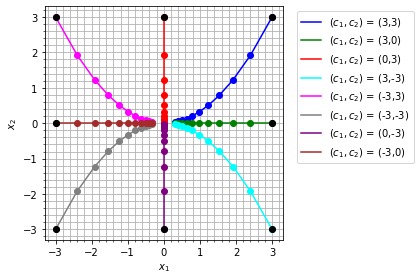

In [17]:
from sympy import *
import matplotlib.pyplot as plt
from functies import *

A = Matrix([[0.8, 0], [0, 0.64]])
c1 = [3, 3, 0, 3, -3, -3, 0, -3]
c2 = [3, 0, 3, -3, 3, -3, -3, 0]
k = 10
X1, X2 = plotOplossingen(A, c1, c2, k)


<!-- ![Evolutie van het systeem met matrix $A$ in
[\[eq:voorbeeldDDS\]](#eq:voorbeeldDDS){reference-type="eqref"
reference="eq:voorbeeldDDS"} voor enkele
startcondities.](figuren/plotDDS.png){#fig:plotDDS width="12cm"} -->

De startcondities worden in de figuur aangeduid met zwarte bolletjes. We
stellen vast dat, van welke waarden we voor $c_1$ en $c_2$ ook starten,
het systeem steeds naar een toestand evolueert waarbij de variabelen
$x_1$ en $x_2$ beide naar 0 convergeren. Dit is een gevolg van het feit
dat beide eigenwaarden in absolute waarde kleiner zijn dan 1. De
oorsprong is dus een aantrekkingspunt (*attractor*).

### Opdracht 2.2

Gegeven is de volgende overgangsmatrix $A$:

$$\label{eq:DDS2}
A = 
\begin{bmatrix}
1.44 & 0 \\
0 & 1.20
\end{bmatrix}.$$

Voer volgende deelopdrachten uit in de cel(len) hieronder:

-   Definieer de matrix $A$.

-   Definieer dezelfde startwaarden voor $c_1$ en $c_2$ als in Opdracht 1.
<!--     Fragment [\[voorbeeldDDS\]](#voorbeeldDDS){reference-type="ref"
    reference="voorbeeldDDS"}. -->

<!-- -   Plot de oplossingen als $k = 5$. Je zou
    Figuur [1.4](#fig:plotDDS2){reference-type="ref"
    reference="fig:plotDDS2"} moeten bekomen.

    ![Figuur bij opdracht 2.](figuren/plotDDS2.png){#fig:plotDDS2
    width="12cm"}
 -->
-   Wat kun je besluiten over de oorsprong?
  

<!-- [\[opd:\]]{#opd: label="opd:"}\ -->

### Opdracht 2.3 

We beschouwen een regio waarbij het aantal uilen en ratten per maand
wordt bestudeerd. Het volgende dynamisch systeem beschrijft de evolutie
in aantallen van beide populaties. Hierbij is $O_k$ het aantal uilen in
de regio en $R_k$ het aantal ratten (per 1000) na $k$ maanden.
$$\left\{\begin{array}{lll}
O_{k+1} &=& 0.5\, O_k + 0.4\, R_k \\
R_{k+1} &=& -p \, O_k + 1.1\, R_k \\
\end{array}\right.$$ Bepaal de evolutie van het bovenstaande dynamisch
systeem als $p=0.125$ (predatieparameter). Bepaal de overgangsmatrix $A$
voor dit systeem: $$\nonumber
A = 
\begin{bmatrix}
\ldots\ldots & \ldots\ldots \\
\ldots\ldots & \ldots\ldots
\end{bmatrix}.$$

<!-- Maak een script *`opdracht3.py`* aan waarin je de volgende
deelopdrachten uitvoert:
 -->
Voer volgende deelopdrachten uit in de cel(len) hieronder:


-   Definieer de matrix $A$.

-   Definieer de volgende startwaarden voor $c_1$ en $c_2$:
    $c_1 = [1, -1, -2]$ en $c_2 = [-4, -3, 1]$.

<!-- -   Plot de oplossingen als $k = 50$ (maanden). Je zou
    Figuur [1.5](#fig:opdr3){reference-type="ref" reference="fig:opdr3"}
    moeten bekomen.

    ![Figuur bij opdracht 3.](figuren/P2_opdracht3.png){#fig:opdr3
    width="\\textwidth"}
 -->
-   Wat zal, bij benadering, op lange termijn de verhouding van het
    aantal uilen t.o.v. het aantal ratten zijn?

-   **Tip**: Vraag het laatste element van de eerste kolom van *`X1`*en
    *`X2`* op <!--     (zie Tabel [1.1](#tab:indexering2){reference-type="ref"
    reference="tab:indexering2"}) --> (zie tabel hieronder), en bereken de verhouding tussen beide
    getallen.

<!--     ::: {#tab:indexering2}
      `A[0,0]`     eerste element van de eerste kolom van `A`
      ------------ ----------------------------------------------
      `A[-1,0]`    laatste element van de eerste kolom van `A`
      `A[0,-1]`    eerste element van de laatste kolom van `A`
      `A[-1,-1]`   laatste element van de laatste kolom van `A`
      `A[0,:]`     eerste **rij** van `A`
      `A[i,:]`     `i+1`-ste **rij** van `A`
      `A[-1,:]`    laatste **rij** van `A`
      `A[:,0]`     eerste **kolom** van `A`
      `A[:,j]`     `j+1`-ste **kolom** van `A`
      `A[:,-1]`    laatste **kolom** van `A`

      : Indexering van matrices (`A` stelt een matrix voor).
    ::: -->
    
|           |            |
|:----------|:-------------|
|      `A[0,0]`     |eerste element van de eerste kolom van `A`
|      `A[-1,0]`    |laatste element van de eerste kolom van `A`
|      `A[0,-1]`    |eerste element van de laatste kolom van `A`
|      `A[-1,-1]`   |laatste element van de laatste kolom van `A`
|      `A[0,:]`     |eerste **rij** van `A`
|      `A[i,:]`     |`i+1`-ste **rij** van `A`
|      `A[-1,:]`    |laatste **rij** van `A`
|      `A[:,0]`     |eerste **kolom** van `A`
|      `A[:,j]`     |`j+1`-ste **kolom** van `A`
|      `A[:,-1]`    |laatste **kolom** van `A`



-   Wat zou er gebeuren met het systeem als een bepaald aspect van het
    model (zoals geboortesnelheid) licht zou gewijzigd worden? Het is
    hierbij nuttig om de eigenwaarden van $A$ te bekijken.

### Opdracht 2.4

In bepaalde bossen jagen de uilen vooral op eekhoorns. Veronderstel voor
deze twee populaties de predator-prooi matrix $$A = \begin{bmatrix}
0.4 & 0.3 \\
-p & 1.2  \end{bmatrix}.$$ 

<!-- Maak een script *`opdracht4.py`* aan waarin
je de nodige berekeningen uitvoert.
 -->
 
Voer volgende deelopdrachten uit in de cel(len) hieronder:

-   Bepaal de eigenwaarden van $A$ in functie van $p$.

-   Wanneer zullen beide populaties aangroeien? Wanneer zullen ze
    uitsterven?

-   Bepaal een waarde voor $p$ waarvoor beide populaties een constante
    grootte hebben. Wat zijn dan de relatieve populatiegroottes? 

-   Stel $p=0.325$. Bepaal de verhouding van de uilen tot de eekhoorns
    op lange termijn.

 

### Complexe eigenwaarden

In de voorbeelden die we tot hiertoe beschouwd hebben waren alle
eigenwaarden van de overgangsmatrix reëel. In de praktijk echter kunnen
ook overgangsmatrices met complexe eigenwaarden voorkomen. Het oplossen
van dergelijke systemen vraagt een andere oplossingsmethode (zie
theorielessen). In dit practicum zullen we gebruik maken van de gegeven
functie `plotOplossingenC`, die quasi analoog is aan de functie
`plotOplossingen` uit de vorige subsectie. Ook nu plot deze functie de
evolutie van het systeem voor verschillende startcondities. Voor de
eenvoud beperken we ons wederom tot systemen waarbij de overgangsmatrix
een $2 \times 2$ matrix is. De argumenten van deze functie zijn:

-   `A`: de overgangsmatrix $A$,

-   `x1_0`: de startcondities voor $x_1$,

-   `x2_0`: de startcondities voor $x_2$,

-   `k`: het aantal tijdstappen.

De functie heeft als outputs:

-   `X1`: een $(k+1)\times n$ matrix met in elke kolom de $x_1$-waarden
    bij de overeenkomstige startwaarden $(x_{1_0},x_{2_0})$, en

-   `X2`: idem voor $x_2$.

Het aantal startwaarden is beperkt tot 10. We zullen de werking van de
functie `plotOplossingenC` illustreren a.d.h.v. de volgende
overgangsmatrix:

$$\label{eq:voorbeeldDDSc}
A = 
\begin{bmatrix}
0.50 & -0.60 \\
0.75 & 1.10
\end{bmatrix}.$$

Als we de instructies in het onderstaand codefragment uitvoeren, dan
krijgen we de trajecten te zien.
<!-- Figuur [1.6](#fig:plotDDSc){reference-type="ref"
reference="fig:plotDDSc"}.
 -->
 

/home/joris/UGent/Onderwijs/Lineaire Algebra/Practica Industrieel ingenieurs/notebooks/functies.py:104: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.plot(X[0,:], X[1,:], 'ko', color = kleur[t])
/home/joris/UGent/Onderwijs/Lineaire Algebra/Practica Industrieel ingenieurs/notebooks/functies.py:104: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.plot(X[0,:], X[1,:], 'ko', color = kleur[t])


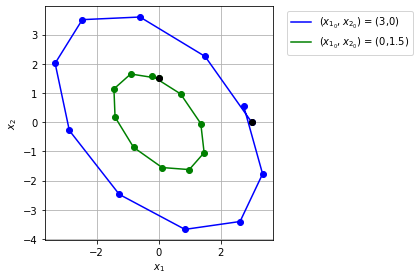

In [20]:
from sympy import *
import matplotlib.pyplot as plt
from functies import *

A = Matrix([[0.5, -0.60], [0.75, 1.10]])
x1_0 = [3, 0]
x2_0 = [0, 1.5]
k = 10
X1, X2 = plotOplossingenC(A, x1_0, x2_0, k)


<!-- ![Evolutie van het systeem met matrix $A$ in
[\[eq:voorbeeldDDSc\]](#eq:voorbeeldDDSc){reference-type="eqref"
reference="eq:voorbeeldDDSc"} voor enkele
startwaarden.](figuren/plotDDSc.png){#fig:plotDDSc width="11cm"} -->

De startcondities worden in de figuur aangeduid met zwarte bolletjes. We
stellen vast dat, van welke waarden we voor $x_{1_0}$ en $x_{2_0}$ ook
starten, het systeem steeds naar een oscillerende toestand evolueert.

<!-- [\[opd:\]]{#opd: label="opd:"}\ -->
### Opdracht 2.5

Gegeven is de volgende overgangsmatrix $A$:

$$\label{eq:DDSc2}
A = 
\begin{bmatrix}
0.8 & 0.5 \\
-0.1 & 1.0
\end{bmatrix}.$$

<!-- Maak een script *`opdracht5.py`* aan waarin je de volgende
deelopdrachten uitvoert: -->

Voer volgende deelopdrachten uit in de cel(len) hieronder:


-   Definieer de matrix $A$.

-   Definieer de volgende startwaarden voor $x_1$ en $x_2$:\
    $x_{1_0} = [2, -2, -1, 2, -1]$ en $x_{2_0}=[2, 2, 1, -2, -1]$.

-   Plot de oplossingen als $k = 25$. 
<!-- Je zou
    Figuur [1.7](#fig:plotDDSc2){reference-type="ref"
    reference="fig:plotDDSc2"} moeten bekomen.
 -->
-   Wat kun je besluiten over de oorsprong?
<!-- -   ![Evolutie van het systeem
    Vergelijking [\[eq:DDSc2\]](#eq:DDSc2){reference-type="eqref"
    reference="eq:DDSc2"} voor de opgegeven
    startcondities.](figuren/plotDDSc2.png){#fig:plotDDSc2 width="12cm"} -->
-   Bereken de eigenwaarden en -vectoren van $A$ op papier. Kan je je
    besluit over de oorsprong hieraan linken?